In [22]:
import pandas as pd

### Reading the dataset

In [32]:
df = pd.read_csv('online_payment.csv')

In [33]:
del df['nameOrig']

In [34]:
del df['nameDest']

In [11]:
df.tail(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362600,22,TRANSFER,652993.91,652993.91,0.0,0.00,0.00,1,0
6362601,22,CASH_OUT,652993.91,652993.91,0.0,0.00,652993.91,1,0
6362602,22,TRANSFER,1819543.69,1819543.69,0.0,0.00,0.00,1,0
6362603,22,CASH_OUT,1819543.69,1819543.69,0.0,0.00,1819543.69,1,0
6362604,22,TRANSFER,54652.46,54652.46,0.0,0.00,0.00,1,0
6362605,22,CASH_OUT,54652.46,54652.46,0.0,0.00,54652.46,1,0
6362606,22,TRANSFER,303846.74,303846.74,0.0,0.00,0.00,1,0
6362607,22,CASH_OUT,303846.74,303846.74,0.0,343660.89,647507.63,1,0
6362608,22,TRANSFER,258355.42,258355.42,0.0,0.00,0.00,1,0
6362609,22,CASH_OUT,258355.42,258355.42,0.0,25176.67,283532.09,1,0


## Checking for imbalance of data

In [14]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

THIS DATA IS HEAVILY IMBALANCED

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Checking for null values

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Checking for same value's being represented with different names

In [6]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [7]:
print_unique_col_values(df)

type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig: ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest: ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


No values are being represented with different names

# Data Visualisation

### Visualising Number of Total Legitimate and Fraudulent Transactions using pie and barplot

In [27]:
import matplotlib.pyplot as plt

In [28]:
import seaborn as sns

Text(0.5, 1.0, 'Pie Chart Depicting Ratio of Legit to Fraud')

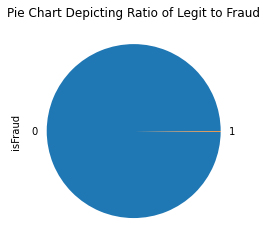

In [29]:
df.isFraud.value_counts().plot(kind='pie')
plt.title("Pie Chart Depicting Ratio of Legit to Fraud")

Text(0, 0.5, 'Number of Transactions')

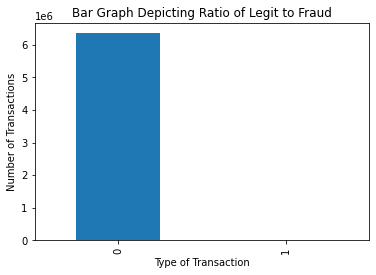

In [30]:
df.isFraud.value_counts().plot(kind='bar')
plt.title("Bar Graph Depicting Ratio of Legit to Fraud")
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transactions")

### Visualising the average transaction amount in legitimate and fraudulent transactions

Text(0, 0.5, 'Amount')

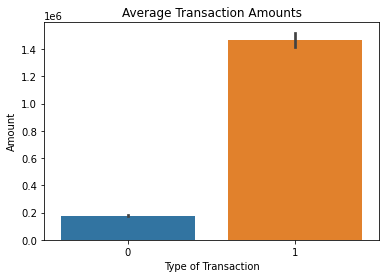

In [31]:
p=sns.barplot(x='isFraud',y='amount',data=df)
p.set_title("Average Transaction Amounts")
p.set_xlabel("Type of Transaction")
p.set_ylabel("Amount")

## CONVERTING STEP COUNT INTO 24 HOUR FORMAT TO BETTER VISUALISE IT

In [35]:
sampledf = df.copy()

In [36]:
sampledf.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [37]:
sampledf['step'] = sampledf["step"].mod(24)

In [38]:
sampledf.tail(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,22,TRANSFER,63416.99,63416.99,0.0,0.00,0.00,1,0
6362611,22,CASH_OUT,63416.99,63416.99,0.0,276433.18,339850.17,1,0
6362612,23,TRANSFER,1258818.82,1258818.82,0.0,0.00,0.00,1,0
6362613,23,CASH_OUT,1258818.82,1258818.82,0.0,503464.50,1762283.33,1,0
6362614,23,TRANSFER,339682.13,339682.13,0.0,0.00,0.00,1,0
6362615,23,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,23,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,23,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,23,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,23,CASH_OUT,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [174]:
crossdf = pd.crosstab(sampledf.step,sampledf.isFraud)

In [192]:
crossdf

isFraud,0,1
step,,
0,71287,300
1,26753,358
2,8646,372
3,1681,326
4,967,274
5,1275,366
6,3062,358
7,8660,328
8,26547,368


In [40]:
legit = sampledf[sampledf.isFraud == 0]
fraud = sampledf[sampledf.isFraud == 1]

### GRAPH SHOWING THE NUMBER OF LEGIT TRANSACTIONS AT VARIOUS HOURS OF THE DAY 

Text(0, 0.5, 'Number of Transactions')

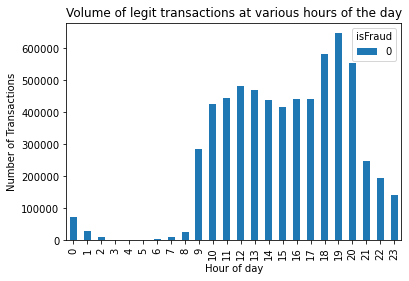

In [41]:
pd.crosstab(legit.step,sampledf.isFraud).plot(kind='bar')
plt.title("Volume of legit transactions at various hours of the day")
plt.xlabel("Hour of day")
plt.ylabel("Number of Transactions")

### GRAPH SHOWING THE NUMBER OF FRAUDULENT TRANSACTIONS AT VARIOUS HOURS OF THE DAY

Text(0, 0.5, 'Number of Transactions')

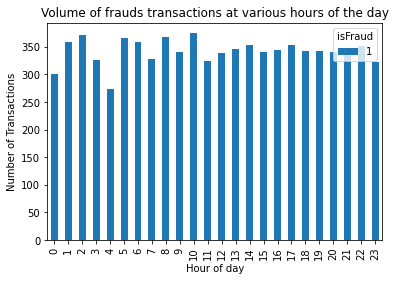

In [42]:
pd.crosstab(fraud.step,sampledf.isFraud).plot(kind='bar')
plt.title("Volume of frauds transactions at various hours of the day")
plt.xlabel("Hour of day")
plt.ylabel("Number of Transactions")

Text(0, 0.5, 'Old Balance of Origin Account')

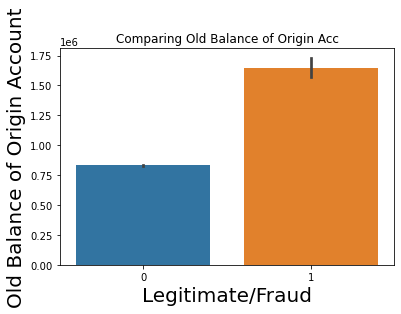

In [57]:
p=sns.barplot(data=sampledf, x="isFraud", y="oldbalanceOrg")
p.set_title("Comparing Old Balance of Origin Acc")
p.set_xlabel("Legitimate/Fraud", fontsize = 20)
p.set_ylabel("Old Balance of Origin Account", fontsize = 20)

Text(0, 0.5, 'New Balance of Origin Account')

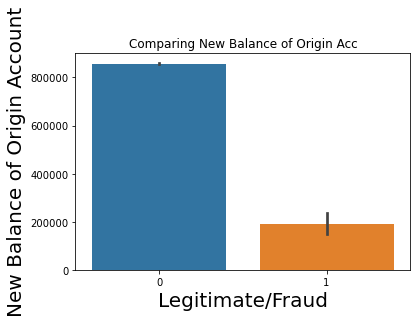

In [58]:
p=sns.barplot(data=sampledf, x="isFraud", y="newbalanceOrig")
p.set_title("Comparing New Balance of Origin Acc")
p.set_xlabel("Legitimate/Fraud", fontsize = 20)
p.set_ylabel("New Balance of Origin Account", fontsize = 20)

Text(0, 0.5, 'Old Balance of Destination Account')

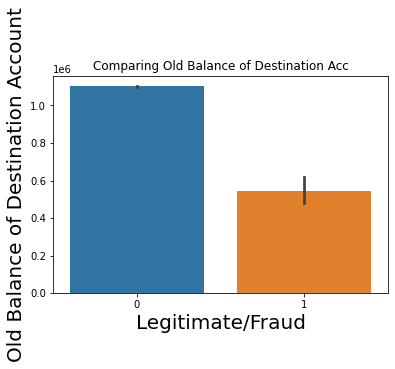

In [59]:
p=sns.barplot(data=sampledf, x="isFraud", y="oldbalanceDest")
p.set_title("Comparing Old Balance of Destination Acc")
p.set_xlabel("Legitimate/Fraud", fontsize = 20)
p.set_ylabel("Old Balance of Destination Account", fontsize = 20)

Text(0, 0.5, 'New Balance of Destination Account')

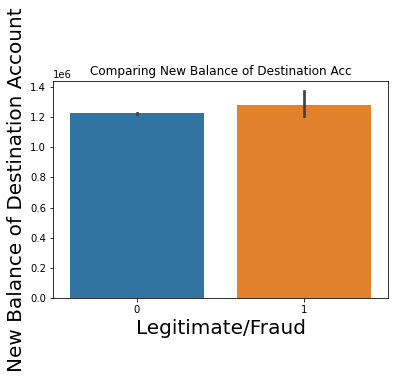

In [60]:
p=sns.barplot(data=sampledf, x="isFraud", y="newbalanceDest")
p.set_title("Comparing New Balance of Destination Acc")
p.set_xlabel("Legitimate/Fraud", fontsize = 20)
p.set_ylabel("New Balance of Destination Account", fontsize = 20)

In [48]:
typecomparedf = pd.crosstab(df.type,df.isFraud)

In [49]:
typecomparedf

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [50]:
typecrossdf = pd.crosstab(fraud.type,fraud.isFraud)

Text(0, 0.5, 'Number of Transactions')

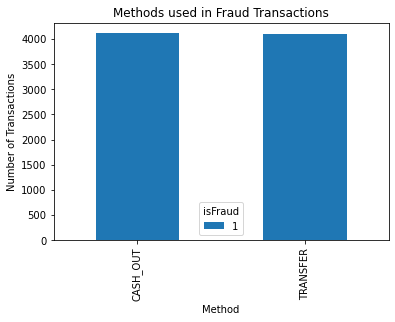

In [51]:
typecrossdf.plot(kind='bar')
plt.title("Methods used in Fraud Transactions")
plt.xlabel("Method")
plt.ylabel("Number of Transactions")

In [52]:
typecrossLegitdf = pd.crosstab(legit.type,legit.isFraud)

Text(0, 0.5, 'Number of Transactions')

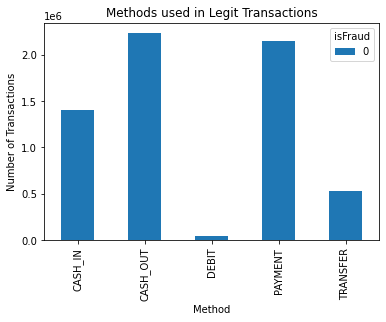

In [53]:
typecrossLegitdf.plot(kind='bar')
plt.title("Methods used in Legit Transactions")
plt.xlabel("Method")
plt.ylabel("Number of Transactions")

In [54]:
FlaggedFraudCrossdf = pd.crosstab(sampledf.isFraud,sampledf.isFlaggedFraud)
FlaggedFraudCrossdf


isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


Text(0.5, 1.0, 'Heatmap')

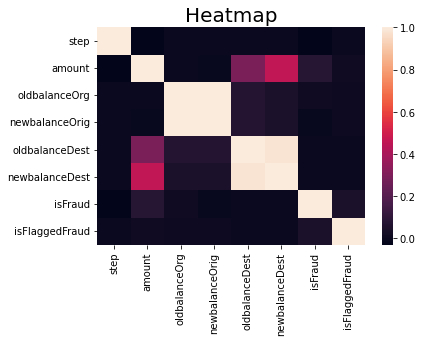

In [55]:
corr=sampledf.corr()
p=sns.heatmap(corr)
p.set_title("Heatmap",fontsize = 20)

In [56]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.029676,-0.001015,-0.000858,-0.001564,-0.006697,-0.031403,-0.000462
amount,-0.029676,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.001015,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.000858,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,-0.001564,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,-0.006697,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,-0.031403,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,-0.000462,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


## Balancing the Data Set

In [7]:
legit = df[df.isFraud == 0]
fraud = df[df.isFraud == 1]

In [23]:
legit.shape

(6354407, 9)

In [24]:
fraud.shape

(8213, 9)

### RANDOM UNDERSAMPLING

In [ ]:
#df['step'] = df["step"].mod(24)

In [23]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = X.select_dtypes(include='object').columns
for i in var:
    X[i] = le.fit_transform(X[i])

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.30 , random_state=0)

In [28]:
X_train = pd.DataFrame(X_train)

In [29]:
y_train = pd.DataFrame(y_train)

In [30]:
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
3019524,17,3,15595.97,0.00,0.00,0.00,0.00,0
1012167,22,3,7613.14,90120.00,82506.86,0.00,0.00,0
5551834,23,4,767351.67,0.00,0.00,4528365.13,5295716.81,0
2081309,14,1,167480.81,1293445.15,1125964.33,0.00,167480.81,0
4457939,11,1,200937.21,104248.00,0.00,3242311.66,3443248.87,0
...,...,...,...,...,...,...,...,...
2249467,19,1,113691.83,4231.00,0.00,397758.64,511450.47,0
5157699,21,1,3891.96,20146.00,16254.04,253375.00,257266.97,0
2215104,18,0,79840.52,10152925.86,10232766.38,276175.87,196335.36,0
1484405,21,0,568604.50,1081784.28,1650388.77,2631796.49,2063191.99,0


In [31]:
y_train

,isFraud
3019524,0
1012167,0
5551834,0
2081309,0
4457939,0
...,...
2249467,0
5157699,0
2215104,0
1484405,0


In [32]:
train = pd.concat([X_train,y_train],axis=1)

In [33]:
train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
3019524,17,3,15595.97,0.00,0.00,0.00,0.00,0,0
1012167,22,3,7613.14,90120.00,82506.86,0.00,0.00,0,0
5551834,23,4,767351.67,0.00,0.00,4528365.13,5295716.81,0,0
2081309,14,1,167480.81,1293445.15,1125964.33,0.00,167480.81,0,0
4457939,11,1,200937.21,104248.00,0.00,3242311.66,3443248.87,0,0
...,...,...,...,...,...,...,...,...,...
2249467,19,1,113691.83,4231.00,0.00,397758.64,511450.47,0,0
5157699,21,1,3891.96,20146.00,16254.04,253375.00,257266.97,0,0
2215104,18,0,79840.52,10152925.86,10232766.38,276175.87,196335.36,0,0
1484405,21,0,568604.50,1081784.28,1650388.77,2631796.49,2063191.99,0,0


In [34]:
print(train.isFraud.value_counts())

0    4448040
1       5794
Name: isFraud, dtype: int64


In [35]:
train_legit = train[train.isFraud == 0]
train_fraud = train[train.isFraud == 1]

In [36]:
train_legit_undersampled = train_legit.sample(5794)

In [37]:
train_undersampled = pd.concat([train_legit_undersampled,train_fraud],axis=0)

In [38]:
print('Train Set Under Sampling')
print(train_undersampled.isFraud.value_counts())

Train Set Under Sampling
0    5794
1    5794
Name: isFraud, dtype: int64


In [39]:
X_train = train_undersampled.drop(['isFraud'],axis=1)
y_train = train_undersampled['isFraud']

In [40]:
y_train.value_counts()

0    5794
1    5794
Name: isFraud, dtype: int64

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
y_predict = model.predict(X_test)

### As we can observe the F-1 score for random undersampling , we can say that it is not optimal for logistic regression model

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80   1906367
           1       0.00      0.98      0.01      2419

    accuracy                           0.67   1908786
   macro avg       0.50      0.82      0.40   1908786
weighted avg       1.00      0.67      0.80   1908786



## RANDOM OVERSAMPLING

In [ ]:
#df['step'] = df["step"].mod(24)

In [8]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = X.select_dtypes(include='object').columns
for i in var:
    X[i] = le.fit_transform(X[i])

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.30 , random_state=0)

In [69]:
X_train = pd.DataFrame(X_train)

In [70]:
y_train = pd.DataFrame(y_train)

In [71]:
train = pd.concat([X_train,y_train],axis=1)

In [72]:
train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
3019524,17,3,15595.97,0.00,0.00,0.00,0.00,0,0
1012167,22,3,7613.14,90120.00,82506.86,0.00,0.00,0,0
5551834,23,4,767351.67,0.00,0.00,4528365.13,5295716.81,0,0
2081309,14,1,167480.81,1293445.15,1125964.33,0.00,167480.81,0,0
4457939,11,1,200937.21,104248.00,0.00,3242311.66,3443248.87,0,0
...,...,...,...,...,...,...,...,...,...
2249467,19,1,113691.83,4231.00,0.00,397758.64,511450.47,0,0
5157699,21,1,3891.96,20146.00,16254.04,253375.00,257266.97,0,0
2215104,18,0,79840.52,10152925.86,10232766.38,276175.87,196335.36,0,0
1484405,21,0,568604.50,1081784.28,1650388.77,2631796.49,2063191.99,0,0


In [73]:
print(train.isFraud.value_counts())

0    4448040
1       5794
Name: isFraud, dtype: int64


In [74]:
train_legit = train[train.isFraud == 0]
train_fraud = train[train.isFraud == 1]

In [75]:
train_fraud_oversampled = train_fraud.sample(4448040,replace=True)

In [76]:
train_oversampled = pd.concat([train_legit,train_fraud_oversampled],axis=0)

In [77]:
print('Train Set Over Sampling')
print(train_oversampled.isFraud.value_counts())

Train Set Over Sampling
0    4448040
1    4448040
Name: isFraud, dtype: int64


In [78]:
X_train_os = train_oversampled.drop(['isFraud'],axis=1)
y_train_os = train_oversampled['isFraud']

In [79]:
y_train_os.value_counts()

0    4448040
1    4448040
Name: isFraud, dtype: int64

In [80]:
model.fit(X_train_os,y_train_os)

LogisticRegression()

In [81]:
y_predict = model.predict(X_test)

### As we can observe the F-1 score for random oversampling , we can say that it is not optimal for logistic regression model

In [82]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80   1906367
           1       0.00      0.98      0.01      2419

    accuracy                           0.67   1908786
   macro avg       0.50      0.82      0.40   1908786
weighted avg       1.00      0.67      0.80   1908786



### We Can Observe that the metrics are shifting drastically with random oversampling

In [83]:
X_train.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06
mean,1.532364e+01,1.713478e+00,1.799547e+05,8.355434e+05,8.567980e+05,1.101304e+06,1.225687e+06,2.245257e-06
std,4.321011e+00,1.350218e+00,6.015259e+05,2.891679e+06,2.927705e+06,3.397815e+06,3.672788e+06,1.498417e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.000000e+00,1.340158e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,1.000000e+00,7.495514e+04,1.422399e+04,0.000000e+00,1.329971e+05,2.149782e+05,0.000000e+00
75%,1.900000e+01,3.000000e+00,2.087196e+05,1.073356e+05,1.442844e+05,9.447042e+05,1.113435e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,7.382349e+07,5.731626e+07,4.731626e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [84]:
X_train_os.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06
mean,1.339652e+01,2.100695e+00,8.180863e+05,1.219756e+06,5.078895e+05,8.327857e+05,1.264021e+06,8.425059e-04
std,6.075399e+00,1.478693e+00,1.847248e+06,3.127024e+06,2.418601e+06,3.572793e+06,3.968449e+06,2.901372e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,3.709883e+04,1.047200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,1.000000e+00,1.734239e+05,1.194433e+05,0.000000e+00,0.000000e+00,1.279058e+05,0.000000e+00
75%,1.800000e+01,4.000000e+00,5.491597e+05,8.024174e+05,0.000000e+00,5.108212e+05,1.086472e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,7.382349e+07,5.731626e+07,4.731626e+07,3.560159e+08,3.561793e+08,1.000000e+00


## SMOTE ON TRAINING DATA

In [94]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [53]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [95]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [96]:
le = LabelEncoder()

In [97]:
var = X.select_dtypes(include='object').columns

In [98]:
for i in var:
    X[i] = le.fit_transform(X[i])

In [99]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.30 , random_state=0,stratify=y)
columns = X_train.columns

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453834 entries, 85163 to 2384085
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 288.8 MB


In [60]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 4453834 entries, 85163 to 2384085
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
4453834 non-null  int64
dtypes: int64(1)
memory usage: 68.0 MB


In [61]:
y_train.value_counts()

0    4448085
1       5749
Name: isFraud, dtype: int64

In [100]:
os = SMOTE(random_state=0)

In [101]:
X_train_sm , y_train_sm = os.fit_resample(X_train,y_train)

In [97]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8896080 entries, 0 to 8896079
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 509.0 MB


In [98]:
y_train_sm.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8896080 entries, 0 to 8896079
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
8896080 non-null  int64
dtypes: int64(1)
memory usage: 67.9 MB


In [99]:
y_train_sm.value_counts()

0    4448040
1    4448040
Name: isFraud, dtype: int64

In [100]:
from collections import Counter
print("BEFORE SMOTE:",Counter(y_train))
print("AFTER SMOTE:",Counter(y_train_sm))

BEFORE SMOTE: Counter({0: 4448040, 1: 5794})
AFTER SMOTE: Counter({0: 4448040, 1: 4448040})


In [101]:
X_train_sm = pd.DataFrame(data=X_train_sm,columns=columns)

In [102]:
X_train_sm

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,17,3,1.559597e+04,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
1,22,3,7.613140e+03,9.012000e+04,82506.86,0.000000e+00,0.000000e+00,0
2,23,4,7.673517e+05,0.000000e+00,0.00,4.528365e+06,5.295717e+06,0
3,14,1,1.674808e+05,1.293445e+06,1125964.33,0.000000e+00,1.674808e+05,0
4,11,1,2.009372e+05,1.042480e+05,0.00,3.242312e+06,3.443249e+06,0
...,...,...,...,...,...,...,...,...
8896075,19,1,7.036089e+04,7.036089e+04,0.00,0.000000e+00,7.036089e+04,0
8896076,12,4,6.524924e+06,6.524924e+06,0.00,0.000000e+00,0.000000e+00,0
8896077,11,1,1.408921e+06,1.408921e+06,0.00,3.742956e+04,1.446351e+06,0
8896078,13,1,1.664772e+06,1.664772e+06,0.00,2.489202e+04,1.689664e+06,0


In [103]:
y_train_sm

0          0
1          0
2          0
3          0
4          0
          ..
8896075    1
8896076    1
8896077    1
8896078    1
8896079    1
Name: isFraud, Length: 8896080, dtype: int64

In [104]:
y_train_sm.value_counts()

0    4448040
1    4448040
Name: isFraud, dtype: int64

In [105]:
y_train_sm

0          0
1          0
2          0
3          0
4          0
          ..
8896075    1
8896076    1
8896077    1
8896078    1
8896079    1
Name: isFraud, Length: 8896080, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [107]:
model.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [108]:
model.score(X_test,y_test)

0.9642123318171865

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
y_predict = model.predict(X_test)

In [111]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906367
           1       0.03      0.88      0.06      2419

    accuracy                           0.96   1908786
   macro avg       0.52      0.92      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786



### We can conclude that SMOTE is not optimal for Logistic Regression , it is altering the metrics of the training data too much as we can observe below

In [112]:
X_train_sm.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06,8.896080e+06
mean,1.314816e+01,2.099793e+00,8.189770e+05,1.220380e+06,5.058733e+05,8.215751e+05,1.251284e+06,3.094621e-04
std,5.489865e+00,1.477131e+00,1.849038e+06,3.114113e+06,2.397210e+06,3.136639e+06,3.576959e+06,1.758881e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,3.728696e+04,1.067300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e+01,1.000000e+00,1.736339e+05,1.201704e+05,0.000000e+00,0.000000e+00,1.276759e+05,0.000000e+00
75%,1.800000e+01,4.000000e+00,5.492915e+05,8.024083e+05,0.000000e+00,5.075282e+05,1.084329e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,7.382349e+07,5.731626e+07,4.731626e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [113]:
X_train.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06
mean,1.532364e+01,1.713478e+00,1.799547e+05,8.355434e+05,8.567980e+05,1.101304e+06,1.225687e+06,2.245257e-06
std,4.321011e+00,1.350218e+00,6.015259e+05,2.891679e+06,2.927705e+06,3.397815e+06,3.672788e+06,1.498417e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.000000e+00,1.340158e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,1.000000e+00,7.495514e+04,1.422399e+04,0.000000e+00,1.329971e+05,2.149782e+05,0.000000e+00
75%,1.900000e+01,3.000000e+00,2.087196e+05,1.073356e+05,1.442844e+05,9.447042e+05,1.113435e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,7.382349e+07,5.731626e+07,4.731626e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [115]:
from sklearn import metrics
import numpy as np
threshold = np.linspace(0.00,1.00,50)
f1 = []
pres = []
rec = []
for i in threshold:
    predicted_proba = model.predict_proba(X_test)
    predicted = (predicted_proba[:,1] >= i).astype('int')# + 1
    f1_score = 100*metrics.f1_score(y_test, predicted)
    precision = 100*metrics.precision_score(y_test, predicted)
    recall = 100*metrics.recall_score(y_test, predicted)
    f1.append(f1_score)
    pres.append(precision)
    rec.append(recall)

In [116]:
results = pd.DataFrame(threshold)
results['f1_score'] = f1
results['precision'] = pres
results['recall'] = rec
results.rename(columns={0: "threshold"},inplace=True)

In [117]:
results

,threshold,f1_score,precision,recall
0,0.000000,0.253139,0.126730,100.000000
1,0.020408,0.399714,0.200258,99.710624
2,0.040816,0.450345,0.225682,99.669285
3,0.061224,0.497983,0.249616,99.545267
4,0.081633,0.569319,0.285479,99.214551
5,0.102041,0.680658,0.341505,98.842497
6,0.122449,0.808346,0.405841,98.346424
7,0.142857,0.938225,0.471372,97.850351
8,0.163265,1.091986,0.549075,97.271600
9,0.183673,1.273441,0.640945,96.610169


# SMOTE ON ENTIRE DATA (WRONG METHOD SHOWN IN VIDEO)

In [9]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
os = SMOTE(sampling_strategy='minority', random_state=0)

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [122]:
var = X.select_dtypes(include='object').columns

In [123]:
for i in var:
    X[i] = le.fit_transform(X[i])

In [124]:
X_sm , y_sm = os.fit_resample(X,y)

In [125]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12708814 entries, 0 to 12708813
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 727.2 MB


In [126]:
y_sm.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12708814 entries, 0 to 12708813
Series name: isFraud
Non-Null Count     Dtype
--------------     -----
12708814 non-null  int64
dtypes: int64(1)
memory usage: 97.0 MB


In [127]:
from collections import Counter
print("BEFORE SMOTE:",Counter(y))
print("AFTER SMOTE:",Counter(y_sm))

BEFORE SMOTE: Counter({0: 6354407, 1: 8213})
AFTER SMOTE: Counter({0: 6354407, 1: 6354407})


In [128]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_sm,y_sm, test_size=0.30 , random_state=0,stratify=y_sm)

In [129]:
X_train.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,8.896169e+06,8.896169e+06,8.896169e+06,8.896169e+06,8.896169e+06,8.896169e+06,8.896169e+06,8.896169e+06
mean,1.318837e+01,2.104186e+00,8.230119e+05,1.240102e+06,5.223527e+05,8.159807e+05,1.243827e+06,6.648929e-04
std,5.458711e+00,1.478243e+00,1.866316e+06,3.249564e+06,2.500204e+06,3.074581e+06,3.522653e+06,2.577695e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,3.709253e+04,1.062500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,1.000000e+00,1.722747e+05,1.191628e+05,0.000000e+00,0.000000e+00,1.231336e+05,0.000000e+00
75%,1.800000e+01,4.000000e+00,5.425354e+05,7.966500e+05,0.000000e+00,5.100078e+05,1.086900e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [130]:
X.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.532145e+01,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,4.321799e+00,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,1.900000e+01,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,2.300000e+01,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [131]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 8896169 entries, 2803692 to 12082608
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
8896169 non-null  int64
dtypes: int64(1)
memory usage: 135.7 MB


In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [133]:
model.fit(X_train,y_train)

LogisticRegression()

In [134]:
model.score(X_train,y_train)

0.836651596884007

In [135]:
model.score(X_test,y_test)

0.8368712534211814

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
y_predict = model.predict(X_test)

### The F-1 Score is showing as 86% however this is due to SMOTE being applied on testing data aswell , which means these results are synthetic , to confirm this you can compare the X_train_sm.describe() from previous method and X_train.describe() of this method , you will find the two identical , which implies that the model being trained is identical , however since the testing data has been tampered , we get these unrealistic/false results in the classifcation report

In [138]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81   1906323
           1       0.76      0.98      0.86   1906322

    accuracy                           0.84   3812645
   macro avg       0.87      0.84      0.83   3812645
weighted avg       0.87      0.84      0.83   3812645



## I will have to find and try some other methods for balancing the data(ADASYN,ensemble focus etc) or use another model for evaluation

This is my progress so far as of 8th june 2022


## ADASYN

In [7]:
from imblearn.over_sampling import ADASYN

In [8]:
ad = ADASYN()

In [9]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = X.select_dtypes(include='object').columns
for i in var:
    X[i] = le.fit_transform(X[i])

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.30 , random_state=672,stratify=y)

In [ ]:
X_train ,y_train = ad.fit_resample(X_train,y_train)

## XGBoost (Selected Model)



In [2]:
import xgboost as xgb

In [61]:
df = pd.read_csv('online_payment.csv')

In [64]:
#df['step'] = df["step"].mod(24)

In [62]:
del df['nameOrig']

In [63]:
del df['nameDest']

In [65]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [8]:
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0,learning_rate=0.5,max_depth=6,sampling_method='gradient_based',max_bin=768,min_child_weight=1,gamma=0.2)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = X.select_dtypes(include='object').columns
for i in var:
    X[i] = le.fit_transform(X[i])

In [10]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')

In [11]:
X.tail(50)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
6362570,740,4,748139.48,748139.48,0.00,0.00,0.00,0
6362571,740,1,748139.48,748139.48,0.00,0.00,748139.48,0
6362572,740,4,1312694.50,1312694.50,0.00,0.00,0.00,0
6362573,740,1,1312694.50,1312694.50,0.00,0.00,1312694.50,0
6362574,740,4,1755647.81,1755647.81,0.00,0.00,0.00,0
6362575,740,1,1755647.81,1755647.81,0.00,2930014.23,4685662.04,0
6362576,741,4,10000000.00,45674547.89,35674547.89,0.00,0.00,0
6362577,741,1,10000000.00,10000000.00,0.00,0.00,10000000.00,0
6362578,741,4,10000000.00,35674547.89,25674547.89,0.00,0.00,0
6362579,741,1,10000000.00,10000000.00,0.00,35922.97,10035922.97,0


In [12]:
X.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.30 , random_state=672,stratify=y)

In [15]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=768, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.89      0.93      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.94      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786



In [19]:
print(confusion_matrix(y_test, y_pred))

[[1906252      70]
 [    279    2185]]


In [20]:
print("Train Accuracy: ",model.score(X_train,y_train))
print("Test Accuracy: ",model.score(X_test,y_test))

Train Accuracy:  0.9999250084309383
Test Accuracy:  0.999817161274234


## KNN(Model)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN = KNeighborsClassifier()

In [69]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred_KNN = KNN.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.87      0.68      0.76      2464

    accuracy                           1.00   1908786
   macro avg       0.93      0.84      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



In [72]:
print(confusion_matrix(y_test, y_pred_KNN))

[[1906065     257]
 [    800    1664]]


In [73]:
print("Train Accuracy: ",KNN.score(X_train,y_train))
print("Test Accuracy: ",KNN.score(X_test,y_test))

Train Accuracy:  0.9995552146757154
Test Accuracy:  0.9994462448907316


## Logistic Regression(Model)

In [74]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [75]:
LR.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred_LR = LR.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.34      0.43      0.38      2464

    accuracy                           1.00   1908786
   macro avg       0.67      0.71      0.69   1908786
weighted avg       1.00      1.00      1.00   1908786



In [77]:
print(confusion_matrix(y_test, y_pred_LR))

[[1904291    2031]
 [   1416    1048]]


In [78]:
print("Train Accuracy: ",LR.score(X_train,y_train))
print("Test Accuracy: ",LR.score(X_test,y_test))

Train Accuracy:  0.998262171423542
Test Accuracy:  0.9981941401498124
